In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

Задача с честной монеткой 1000 испытаний по 10 подбрасываний

In [2]:
#вероятность выпадения орла 0,5
p = 0.5

#количество подбрасываний
n = 10

#построение выборки
bi_test = np.random.binomial(n, p, size = 10000)

Построим гистограмму

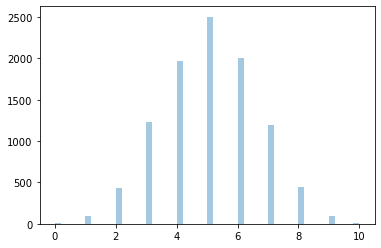

In [3]:
sns.distplot(bi_test, hist=True, kde=False)

plt.show()

Для проверки гипотезы, что параметры верно заданы, воспользуемся критерием хи-квадрат

In [4]:
#Построим таблицу(для удобства вызова словарь) частот нашей выборки
freq_test = {}
for i in bi_test:
    if i in freq_test:
        freq_test[i] += 1
    else:
        freq_test[i] = 1

In [5]:
#отсортируем и убирем ключи
freq_test_int = [freq_test[i] if i in freq_test.keys() else 0 for i in range(11)]

In [6]:
#посчитаем вероятности
proba_test = [round(i/10000, 3) for i in freq_test_int]

In [7]:
#создадим массив вероятностей для разных параметров

#для наших параметров
true_proba = []

#для n=10, p= 0.2
false_proba1 = []

#для n=10, p= 0.9
false_proba2 = []

#для n=15, p= 0.5
false_proba3 = []

#для n=5, p= 0.5
false_proba4 = []

for k in range(11):
    true_proba.append(st.binom.pmf(k, 10, 0.5))
    false_proba1.append(st.binom.pmf(k, 10, 0.2))
    false_proba2.append(st.binom.pmf(k, 10, 0.9))
    false_proba3.append(st.binom.pmf(k, 15, 0.5))
    false_proba4.append(st.binom.pmf(k, 5, 0.5))

In [8]:
#зададим ось х
x = np.arange(0, 11, 1)

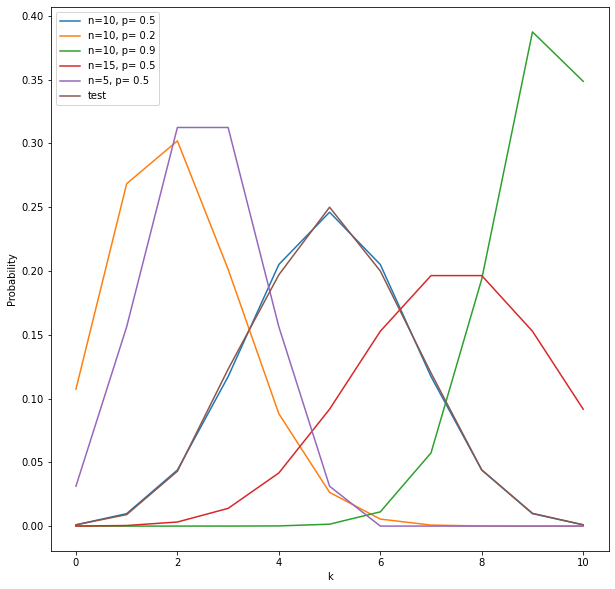

In [9]:
#построим все полученные распределения на одном графике
fig = plt.figure(figsize=(10, 10))
plt.plot(x, true_proba, label= 'n=10, p= 0.5')
plt.plot(x, false_proba1, label='n=10, p= 0.2')
plt.plot(x, false_proba2, label='n=10, p= 0.9')
plt.plot(x, false_proba3, label='n=15, p= 0.5')
plt.plot(x, false_proba4, label='n=5, p= 0.5')
plt.plot(x, proba_test, label='test')
plt.xlabel('k')
plt.ylabel('Probability')
plt.legend()
plt.show()

Для нахождения хи-квадрата выполним следующее действие:

In [10]:
#из массива вероятностей получим массив частот для каждого из распределения
true_freqs = [i * 10000 for i in true_proba]
false_freqs1 = [i * 10000 for i in false_proba1]
false_freqs2 = [i * 10000 for i in false_proba2]
false_freqs3 = [i * 10000 for i in false_proba3]
false_freqs4 = [i * 10000 for i in false_proba4]

Считать хи-квадрат будем с помощью функции встроенной в библиотеку scipy.stats

In [11]:
st.chisquare(freq_test_int, true_freqs)

Power_divergenceResult(statistic=10.649071746031746, pvalue=0.38550381952769974)

In [12]:
st.chisquare(freq_test_int, false_freqs1)

Power_divergenceResult(statistic=924389.3918105289, pvalue=0.0)

In [13]:
st.chisquare(freq_test_int, false_freqs2)

Power_divergenceResult(statistic=331244631.34546643, pvalue=0.0)

In [14]:
st.chisquare(freq_test_int, false_freqs3)

Power_divergenceResult(statistic=28156.024550953523, pvalue=0.0)

In [15]:
st.chisquare(freq_test_int, false_freqs4)

C:\Users\Administrator\anaconda3\lib\site-packages\scipy\stats\stats.py:5996: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs.astype(np.float64) - f_exp)**2 / f_exp


Power_divergenceResult(statistic=inf, pvalue=0.0)

Из полученных выше p-value видно, что наша гипотеза была верна